In [1]:
# OK, let's see what the sky level looks like for a typical narrowband observation.  
# This is using some other parts of the LSST stack, so might be tricky to run, but 
# I'll try to print out all the relevant parts

In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.skybrightness import SkyModel
import os

from lsst.sims.photUtils.Bandpass import Bandpass 

In [17]:
# initialize the sky model
sb = SkyModel()

In [36]:
# Read in the narrowband throughputs
splus_filt_dir =  'splus_filter_curves'
narrowbandfiltlist = ['F378', 'F395', 'F410', 'F430', 'F515', 'F660', 'F861']

splus_narrowbands = {}
for filtername in narrowbandfiltlist:
    from_file = np.loadtxt(os.path.join(splus_filt_dir,filtername+'.dat'))
    tempB2 = Bandpass()
    tempB2.setBandpass(from_file[:,0]/10., from_file[:,1])
    
    splus_narrowbands[filtername] = tempB2

In [37]:
# Let's set the where we are looking in the sky
sb.setRaDecMjd(0., 70., 59853.19, degrees=True, azAlt=True)

In [38]:
# Check that we picked an MJD where the sun and moon are down.
np.degrees(sb.sunAlt), np.degrees(sb.moonAlt)

(-56.586539499857366, -7.7006592136904413)

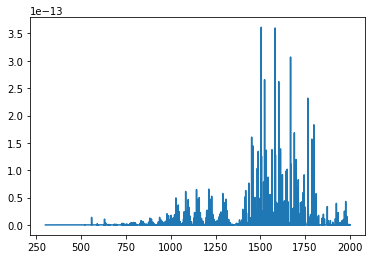

In [39]:
wave, spec = sb.returnWaveSpec()
plt.plot(wave, spec.ravel())

In [40]:

lsst_mags = sb.returnMags(bandpasses=splus_narrowbands)
lsst_mags

{'F378': array([ 22.63060826]),
 'F395': array([ 22.66559093]),
 'F410': array([ 22.39495818]),
 'F430': array([ 22.37808949]),
 'F515': array([ 21.89181356]),
 'F660': array([ 21.22310616]),
 'F861': array([ 19.36278739])}

In [42]:
# Just to compare, let's check what the broadband mag backgrounds are
sb = SkyModel(mags=True)
sb.setRaDecMjd(0., 70., 59853.19, degrees=True, azAlt=True)
lsst_mags = sb.returnMags()

In [43]:
lsst_mags

{'g': array([ 22.0279839]),
 'i': array([ 20.25334748]),
 'r': array([ 21.08485684]),
 'u': array([ 22.72624638]),
 'y': array([ 18.15891063]),
 'z': array([ 19.33414126])}